<a href="https://colab.research.google.com/drive/1VZEjhswmICC1IIiQcqTJ9F2Q6FugaIoR?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

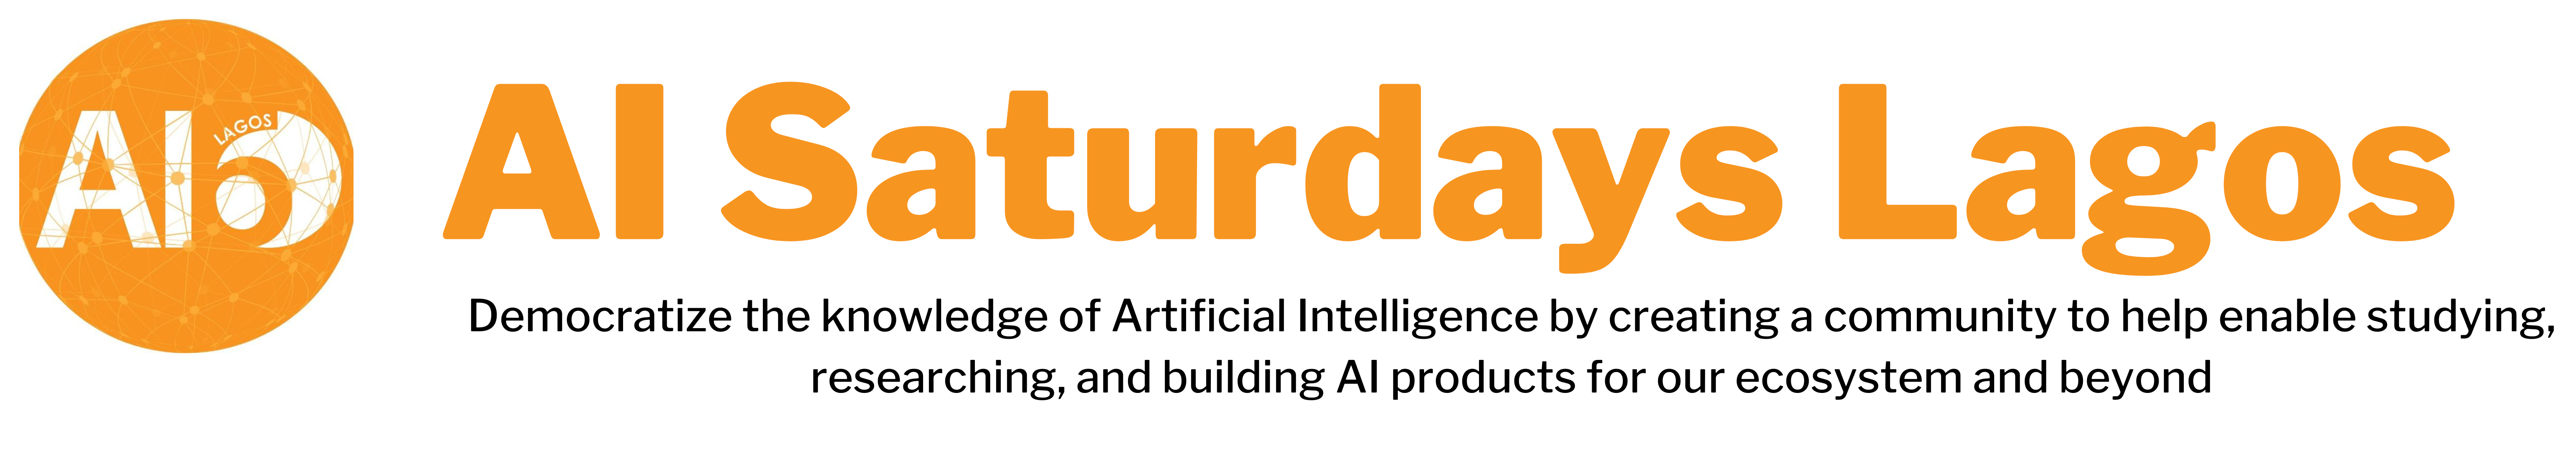

<h2 align=center><font size = 5>Week 7 Lab: Free Text and Natural Language Processing</font></h2>
<p align=center><font size = 4>Tutor: <a href="https://www.linkedin.com/in/fortune-adekogbe" target="_blank">Fortune Adekogbe</a></font></p><br>

<h3 align=center><font size = 4>Data Source: <a href="http://www.nigeria-law.org/ConstitutionOfTheFederalRepublicOfNigeria.htm" target="_blank">The Nigerian Constitution<a/></font></h3>

One of the defining limitations of machine learning models today is their inability to process data in its raw form. Over the years, we have had to devise ways to make the learning task easier for these models by first preparing the data. This is analogous to the way your instructors and tutors have prepared learning resources to make the dive into data science relatively easy for you. This is the case with categorical data, as you have learned, numeric data in some instances, text data, image data, and audio data. Sometimes, the task of preparing the data is assigned to an entirely separate model.

In this lab, you will experiment with the techniques we have developed to process text data over the years and get an idea of how they are used to carry out various tasks.

## Scraping Data

In [ ]:
from bs4 import BeautifulSoup
import requests
import re

response = requests.get(
    "http://www.nigeria-law.org/ConstitutionOfTheFederalRepublicOfNigeria.htm"
)
root = BeautifulSoup(response.content, "lxml")
constitution_words = re.sub(r"\s+"," ", root.text) # replace whitespaces with a single space

In [ ]:
constitution_words

## Tokenisation

Depending on the langauge processing task you are dealing with, you may have to deal with text in form of paragraphs, sentences, words or characters. But the data typically does not come in that way. Take for instance the `constitution_words` you just scraped and preprocessed using `RegEx`. For the sake of this lab, we shall assume that you intend to deal with the data on the level of sentences. The first question you could ask is what is a sentence?

### Sentence Tokenisation

In [ ]:
constitution_words

As you can see in the output above, there is not much order since all we did was scrape a single page web site containing all the details in the Nigerian constitution. So, how do we go from these words to sentences? First, we must take a step back to the `root.text` we scraped.

In [ ]:
root.text

Immediately, we can see that the a particular string character occurs releatedly. The `"\n"` character aka, newline. This holds some promise. Perhaps if we split the data into newlines and remove whitespaces, we might get a representation that is closer to our definition of sentences. Lets try this out!

In [ ]:
' The boy   '.strip()

In [ ]:
constitution_lines = [re.sub(r"\s+"," ", line).strip() for line in root.text.split("\n") if line.strip()]
constitution_lines[50:100]

As you now see, the text looks more like sentences. But there are still some samples that shouldn't qualify as a sentence, in any sense of the word. Some of them seem to be single character or a few words that do not mean much together. How do we filter them out?

In [ ]:
constitution_lines = [re.sub(r'\d+', '', line.lower())
                    for line in constitution_lines if len(line.split()) > 3]

In [ ]:
constitution_lines[50:100]

Now, it seems like we have something that resembles sentences to a better degree. We'll manage this in this lab. But then, is this all we need to do as regards tokenisation? If we were dealing with sentence tokenisation, yes. but what about the others?

### Word Tokenisation

This simply implies that you have to split the sentences into words. But how do you do that?

In [ ]:
wt_constitution_lines = [sentence.split() for sentence in constitution_lines]
wt_constitution_lines[50:100]

One question you might have is what happens to punctuations during tokenisation? Well, it turns out that you decide what happens. Above, we left the tokens in the sentences and treated them as either part of a word or as individual tokens depending on where they appear in a sentence. But what if you want them to be treated as individual tokens?

In [ ]:
import nltk # pip install nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

text = "Hello, world! How's it going?"
tokens = word_tokenize(text)
print(tokens)

In [ ]:
wt_constitution_lines = [word_tokenize(sentence) for sentence in constitution_lines]
wt_constitution_lines[50:100]

### Character Tokenisation

In this case, your goal is to split the sentences into individual characters. One easy way to do that is to use the `list` constructor. But why does it work?

In [ ]:
ct_constitution_lines = [list(sentence) for sentence in constitution_lines]
print(ct_constitution_lines[50])

### Notable Mention: Subword Tokenisation
For some languages, English included, it is useful to break down words into smaller units. This is particularly useful when dealing with compound words `(e.g. "Irregardless" which can be broken down into "Ir", "regard" and "less") `or when dealing with out-of-vocabulary words. Techniques like [Byte-Pair Encoding (BPE)](https://towardsdatascience.com/byte-pair-encoding-subword-based-tokenization-algorithm-77828a70bee0) and [WordPiece](https://towardsdatascience.com/wordpiece-subword-based-tokenization-algorithm-1fbd14394ed7) are popular subword tokenization methods.

BPE in particular works by splitting words into smaller, more frequent units. This makes it easier for it to handle rare words and out-of-vocabulary terms by decomposing them into familiar subword units.

In [ ]:
"author"  "is" "a" "tion"
"author" "i" "ty"

In [ ]:
!pip install sentencepiece

In [ ]:
with open('data.txt', 'w') as f:
    f.write('\n'.join(constitution_lines))

In [ ]:
import sentencepiece as spm

# Train
spm.SentencePieceTrainer.train(input='data.txt', model_prefix='m', vocab_size=2000)

In [ ]:
sp = spm.SentencePieceProcessor(model_file='m.model')

In [ ]:
# Known word
word = "constitution"
tokens = sp.EncodeAsPieces(word)
print(f"{word}: {tokens}")

# Unknown word
word = "restitution"
tokens = sp.EncodeAsPieces(word)
print(f"{word}: {tokens}")

In [ ]:
sp.EncodeAsPieces("subordinate jurisdiction to that of a High Court;")

## Visualizing Text Data

2 weeks ago, you learnt about data visualization techniques. I'm sure you enjoyed the class but how does that apply to text data? One of the most natural ways to go about this is via a frequency plot. But how? and on what level?

### Trial 1: Character Level Histogram

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

separate_characters = list(''.join(constitution_lines))
character_frequency = np.unique(separate_characters, return_counts=True)

In [ ]:
plt.figure(figsize=(10, 15))
plt.barh(character_frequency[0], character_frequency[1], )

### Trial 2: Word Level Histogram

In [ ]:
new_constitution_words = ' '.join(constitution_lines)
word_frequency = np.unique(new_constitution_words.split(), return_counts=True)

In [ ]:
word_frequency[1].shape

In [ ]:
plt.barh(word_frequency[0], word_frequency[1])

### Trial 3: Word Cloud

The word cloud is an interesting way to visualize the frequency of words in a dataset. What it does is that it represents high-frequency words with larger font sizes. It also varies the font-color to make the visualization interesting.


In [ ]:
new_constitution_words

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(width=1200, height=400, max_words=6000, random_state=42).generate(new_constitution_words)
wc.to_image()

Which do you prefer and why?

## Vectorization

So far, we've been playing around with data in its textual form. But for machines, this makes no sense. Machines understand 0s and 1s, and numbers are the most direct way to communicate this with them. The process of converting text into numeric data is known as vectorization. The question then is, what does that entail?

### Introducing: Bag of Words

 This a method of representing text data where the order or structure of words is discarded, and only the frequency or presence of words is considered.

### One-hot Encoding

If you paid attention during one of the early classes on handling categorical data, this might be familiar. A one-hot encoding is a vector that assigns each word to an index such that when it is being processed, all other indexes representing the other words in the dataset are 0s while the word of interest is a 1. For instance, if the only sentence in the dataset was:
`"The ultimate answer is 42."` then, the vector corresponding to answer might have the vector `[0, 0, 1, 0, 0]`. In this case, indices match the occurence of the word in the sentence). If the vector ordered the words alphabetically, it would be `[0, 1, 0, 0, 0]`. Who can tell me why `1` is not the first value in the vector?

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Create a vocabulary from the tokenized dataset
vocab = sorted(set(token for sentence in wt_constitution_lines for token in sentence))

# Use OneHotEncoder to one-hot encode the vocabulary
encoder = OneHotEncoder(categories=[vocab], sparse_output=False)

# One-hot encode the tokenized sentences
one_hot_encoded_constitution = []

for sentence in tqdm(wt_constitution_lines):
    encoded_sentence = encoder.fit_transform([[token] for token in sentence])
    one_hot_encoded_constitution.append(encoded_sentence)

In [ ]:
sample_idx = 0
print(len(wt_constitution_lines[sample_idx]), len(vocab))
one_hot_encoded_constitution[sample_idx].shape

### Term Frequency-Inverse Document Frequency (TFIDF)

One-hot encodings are nice but they don't hold a lot of contextual information about what a word is in a sentence and how it is reflected in other sentences or across the whole dataset. One way to escape this limitation is by creating term frequency-inverse document frequency vectors instead. So, lets do this instead.

#### Term Frequency

 This measures how frequently a term occurs in a document. In our context, documents are sentences. If we have a document with 100 words and the term "apple" appears 5 times, the term frequency for "apple" is 5/100 = 0.05.

In [ ]:
def compute_tf(document, word):
    return document.count(word) / len(document)

In [ ]:
wt_constitution_lines[73]

In [ ]:
compute_tf(wt_constitution_lines[73], "of")

In [ ]:
compute_tf(wt_constitution_lines[73], "constitution")

#### Inverse Document Frequency

This measures how unique or rare a term is across all documents in the corpus. If the term "apple" appears in 50 out of 1000 documents, the IDF is calculated as the logarithm of the total number of documents divided by the number of documents containing the term.

In [ ]:
def compute_idf(word, constitution_lines):
    docs_containing_word = sum(1 for sentence in constitution_lines if word in sentence)
    return np.log(len(constitution_lines) / (1 + docs_containing_word))  # Added 1 to avoid division by zero

In [ ]:
compute_idf("the", wt_constitution_lines)

In [ ]:
compute_idf("constitution", wt_constitution_lines)

#### Bringing TF and IDF together

The TF-IDF is simply the product of TF and IDF. It's designed to reflect how important a word is to a document in a dataset (or corpus).

In [ ]:
def compute_tf_idf(document, word, wt_constitution_lines):
    tf = compute_tf(document, word)
    idf = compute_idf(word, ct_constitution_lines)
    return tf * idf

In [ ]:
def sentence_tf_idf(wt_sentence, vocab):
    # Calculate TF-IDF for a sentence
    vector = []
    for word in wt_sentence:
        vector.append(compute_tf_idf(wt_sentence, word, wt_constitution_lines))
    return vector

In [ ]:
# Display results
idx = 42
wt_sentence = wt_constitution_lines[idx]
print("Sentence:", ' '.join(wt_sentence))

vector = sentence_tf_idf(wt_sentence, vocab)
for i, score in enumerate(vector):
    print(f"{wt_sentence[i]}: {score:.4f}")

### Notable mention: Gensim TF-IDF

In practice, you wouldn't have to implement these vectors yourself. A library that is popularly used for natural language tasks is `gensim`.

In [ ]:
import gensim as gs
from gensim import corpora
from gensim.models import TfidfModel

# Create a dictionary from the tokenized sentences
dictionary = corpora.Dictionary(wt_constitution_lines)

# Convert tokenized sentences into bag-of-words format
bow_corpus = [dictionary.doc2bow(sentence) for sentence in wt_constitution_lines]

# Create a TF-IDF model
tfidf_model = TfidfModel(bow_corpus)

# Get TF-IDF vectors
tfidf_vectors = [tfidf_model[bow] for bow in bow_corpus]

In [ ]:
# Display results
idx = 42
sentence = wt_constitution_lines[idx]
print("Sentence:", sentence)
for word_id, score in tfidf_vectors[idx]:
    print(f"{dictionary[word_id]}: {score:.4f}")

### Comparing sentences

To compare sentences, we would typically have to look at them and spot differences in interpretation based on our understanding of the context. Since we now have the sentences as numerical vectors, one way to compare them is using cosine similarity.

$$ \text{cosine similarity}(A, B) = \frac{A \cdot B}{\|A\| \|B\|} $$

In [ ]:
sample_idx_1 = 42
sample_idx_2 = 73

print(f"Sentence 1: {' '.join(wt_constitution_lines[sample_idx_1])}")
print(f"Sentence 2: {' '.join(wt_constitution_lines[sample_idx_2])}")

similarity = gs.matutils.cossim(
    vec1=tfidf_vectors[sample_idx_1],
    vec2=tfidf_vectors[sample_idx_2],
)
print(similarity)

As you can see, we have been able to create vectors that hold some meaningful context. But is that really sufficient? And why?

## Word Embeddings

It turns out that we can extract even more information from words. When you think about words like eat and eaten or school and student, it is obvious that there's some relationship. But how can a computer know this?  

Answer: ...

While we can train a word embeddding on our data, for English language, its more reasonable to rely on pretrained embeddings. Since they will have considered way more words and have a better contextual representation. There are a number of Python packages that make it easy for you to get started with word embeddings. We will explore some of them now.

### Gensim

In [ ]:
!gdown 0B7XkCwpI5KDYNlNUTTlSS21pQmM

In [ ]:
!gunzip GoogleNews-vectors-negative300.bin.gz

In [ ]:
from gensim.models import KeyedVectors

# Loading pre-trained word embeddings
word_vectors = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [ ]:
def get_gensim_embeddings(wt_sentence):
    embeddings = []
    for word in wt_sentence:
        if word in word_vectors:
            embeddings.append(word_vectors[word])
    return embeddings

In [ ]:
gensim_embeddings = get_gensim_embeddings(wt_constitution_lines[0])
print(np.shape(gensim_embeddings))

#### Word Similarity

In [ ]:
def gensim_similarity(word1, word2):
    if word1 in word_vectors and word2 in word_vectors:
        return word_vectors.similarity(word1, word2)
    return 0

In [ ]:
print(gensim_similarity("love", "hate"))

In [ ]:
print(gensim_similarity("constitution", "law"))

In [ ]:
print(gensim_similarity("school", "student"))

In [ ]:
gensim_similarity('atoms','electrons')

#### Visualizing Embeddings

In [ ]:
selected_words = ["love", "hate", "natural", "artificial", "language", "word", "computer", "book", "paper", "constitution", "law"]
word_embeddings = np.array([word_vectors[word] for word in selected_words if word in word_vectors])
word_embeddings.shape

In [ ]:
from sklearn.manifold import TSNE

def visualize_embeddings_2D(selected_words, word_embeddings, word_vectors):
    # Project embeddings into 2D using t-SNE
    tsne = TSNE(n_components=2, random_state=42, learning_rate='auto', perplexity=3)
    word_2d_embeddings = tsne.fit_transform(word_embeddings)

    plt.figure(figsize=(8, 8))
    for i, word in enumerate(selected_words):
        if word in word_vectors:
            plt.scatter(word_2d_embeddings[i, 0], word_2d_embeddings[i, 1], marker='+', color='red')
            plt.text(word_2d_embeddings[i, 0]+0.2, word_2d_embeddings[i, 1], word, fontsize=9)
    plt.show()

In [ ]:
visualize_embeddings_2D(selected_words, word_embeddings, word_vectors)

#### Comparing sentences

In [ ]:
sentence1 = word_tokenize("Right to freedom of expression and the press.".lower())
sentence2 = word_tokenize("Right to freedom from discrimination.".lower())
word_vectors.n_similarity(sentence1, sentence2)

In [ ]:
sentence1 = word_tokenize("Right to freedom of expression and the press.".lower())
sentence2 = word_tokenize("secure full residence rights for every citizen in all parts of the Federation.".lower())
word_vectors.n_similarity(sentence1, sentence2)

### SpaCy

In [ ]:
!python -m spacy download en_core_web_lg  -q

In [ ]:
import spacy

nlp = spacy.load("en_core_web_lg")

doc = nlp("This is a sentence.")
print([(w.text, w.pos_) for w in doc])

#### Lemmatization
Converting a word to its base or root form.

In [ ]:
doc = nlp("She was fighting for her children.")

for token in doc:
    print(token.text, "->", token.lemma_)

#### Word Similarity

In [ ]:
def spacy_similarity(word1, word2):
    return nlp(word1).similarity(nlp(word2))

print(spacy_similarity("love", "hate"))

In [ ]:
spacy_similarity("constitution", "law")

In [ ]:
spacy_similarity("afrobeat", "music")

#### Visualizing Embeddings

In [ ]:
selected_words = ["love", "hate", "natural", "artificial", "language", "word", "computer", "book", "paper", "constitution", "law"]
word_embeddings = np.array([nlp(word).vector for word in selected_words if word in word_vectors])
word_embeddings.shape

In [ ]:
visualize_embeddings_2D(selected_words, word_embeddings, nlp.vocab)

In [ ]:
selected_cwords = ["objection", "approve", "yoruba", "nigeria", "language", "word", "writing", "customer", "customs", "constitution", "law"]
cword_embeddings = np.array([nlp(word).vector for word in selected_cwords if word in word_vectors])
cword_embeddings.shape

In [ ]:
visualize_embeddings_2D(selected_cwords, cword_embeddings, nlp.vocab)

### Training Your Word Embedding Model

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=wt_constitution_lines, vector_size=100, window=5, min_count=1, workers=4)
model.save("my_word2vec_model.bin")

In [ ]:
model = Word2Vec.load('my_word2vec_model.bin')

In [ ]:
model.wv.similarity('constitution','law')

A limitation of training your own word embedding model is that it will be limited in its understanding of context and exposure to different words. Take the example below for instance, we run into an error because the model does not know the word "student":

In [ ]:
# model.wv.similarity('school','student')

#### Visualizing Embeddings

In [ ]:
model.wv['law']

In [ ]:
selected_cwords = ["objection", "approve", "yoruba", "nigeria", "language", "word", "writing", "customer", "customs", "constitution", "law"]
cword_embeddings = np.array([model.wv[word] for word in selected_cwords if word in model.wv])
cword_embeddings.shape

In [ ]:
visualize_embeddings_2D(selected_cwords, cword_embeddings, model.wv)

## Sentence Embeddings

Word embeddings are great and they work really well. It is however also useful to consider embeddings on a sentence level. While we can aggregate embeddings of words in a sentence, sentence embeddings are more useful as they carry more context about the relationship between words. Especially when trained on a lot of data.

### Google Universal Sentence Encoder via SpaCy

In [ ]:
!pip install spacy-universal-sentence-encoder -q

In [ ]:
import spacy_universal_sentence_encoder

nlp = spacy_universal_sentence_encoder.load_model('en_use_lg')

In [ ]:
sentence1 = nlp("Right to freedom of expression and the press.")
sentence2 = nlp("Right to freedom from discrimination.")
sentence1.similarity(sentence2)

In [ ]:
sentence2.vector.shape

In [ ]:
sentence1 = nlp("Right to freedom of expression and the press.")
sentence2 = nlp("secure full residence rights for every citizen in all parts of the Federation.")
sentence1.similarity(sentence2)

### [Cohere Sentence Embeddings](https://docs.cohere.com/docs/embeddings)

To get your API Key, [create a Cohere account](https://dashboard.cohere.com/welcome/register) and navigate to the [API Key section](https://dashboard.cohere.com/api-keys) on your dashboard.

Then, copy the key and return to Colab.

In [ ]:
!pip install cohere

In [ ]:
import cohere
from getpass import getpass

# ADD YOUR API KEY HERE
api_key = getpass('Enter your API key value: ')

# Create and retrieve a Cohere API key from dashboard.cohere.ai
co = cohere.Client(api_key)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

sentence1 = np.array(co.embed(["Right to freedom of expression and the press."]).embeddings)
sentence2 = np.array(co.embed(["Right to freedom from discrimination."]).embeddings)
cosine_similarity(sentence1, sentence2)[0][0]

In [ ]:
sentence1 = np.array(co.embed(["Right to freedom of expression and the press."], ).embeddings)
sentence2 = np.array(co.embed(["secure full residence rights for every citizen in all parts of the Federation."]).embeddings)
cosine_similarity(sentence1, sentence2)[0][0]

#### Multi-lingual Sentence Embedding

In [ ]:
sentence1 = np.array(co.embed(["How are you?"], model="embed-multilingual-v2.0").embeddings)
sentence2 = np.array(co.embed(["bawo ni e?"], model="embed-multilingual-v2.0").embeddings)
cosine_similarity(sentence1, sentence2)[0][0]

## N-Gram Language Model

An N-gram is a contiguous sequence of N items (words, letters, symbols) from a given sample of text.

In [ ]:
import nltk
from nltk.util import ngrams
from nltk.tokenize import word_tokenize

nltk.download('punkt')  # Download the Punkt tokenizer model, if not already

def generate_ngrams(sentences, n=2):
    all_ngrams = []
    for tokens in sentences:
        n_grams = ngrams(tokens, n)
        all_ngrams.extend(n_grams)
    return all_ngrams

In [ ]:
bigrams = generate_ngrams(wt_constitution_lines, n=2)
bigrams[:50]

### Probability Estimation

You can estimate probabilities using Maximum Likelihood Estimation (MLE):

$$ P(w_n | w_{n-1}) = \frac{count(w_{n-1}, w_n)}{count(w_{n-1})} $$

For instance, using bigrams, the probability of "government" following "good" is calculated by dividing the number of occurrences of "good government" by the number of occurrences of "good".

In [ ]:
from collections import Counter

bigram_counts = Counter(bigrams)
unigram_counts = Counter(generate_ngrams(wt_constitution_lines, n=1))

def bigram_probability(word1, word2):
    bigram = (word1.lower(), word2.lower())
    unigram = (word1.lower(),)
    if unigram in unigram_counts and bigram in bigram_counts:
        return bigram_counts[bigram] / unigram_counts[unigram]
    return 0

In [ ]:
print(bigram_probability("good", "government"))

## Evaluating Language Models

So far, we have discussed what you do to text data before passing it to a model of your choice. But what happens after? Typically your models make predictions and then you evaluate the result. If its a classification or regression problem, general machine learning metrics like accuracy and f1-score can be used. But what if you're generating text? How do you compare it to a ground truth?

In this section, examples used assume a language translation task from English to Nigerian Pidgin. Experiment with using your own english sentences to query [ChatGPT](https://chat.openai.com/) and ["Ehn?"](https://nithub-ai-ehn-english-to-nigerian-pidgin-translator.hf.space/). In this instance, you decide what the correct translation is and can compare the prediction with it using the metrics below.

### BLEU Metric

BLEU (Bilingual Evaluation Understudy) is a metric used to evaluate the quality of machine-generated translations against one or more reference translations.

- BLEU evaluates machine-generated translations against reference translations.
- It measures n-gram precision between the generated and reference text.
- The metric applies a brevity penalty to shorter translations to avoid inflated scores.
- BLEU can work with multiple reference translations to account for - varied correct translations.
- Scores range from 0 to 1, with 1 indicating a perfect match in terms of n-grams.
- Despite its usefulness, BLEU doesn't always align with human judgment of translation quality.

In [ ]:
from nltk.translate.bleu_score import sentence_bleu
candidate = "Naw, I don undastand dis book."

reference: list = ["I don undastand dis book naw.", "Dis book dey make sense to me naw", "Naw, I sabi dis book"]

print('BLEU score -> {}'.format(sentence_bleu(reference, candidate)))

### ChrF (Character n-gram F-score)

The Character n-gram F-score evaluates the output of machine translation systems using character n-gram precision and recall. It was primarily designed to evaluate the output of translation systems but can also be used in text summarization and grammar correction systems.


In [ ]:
from nltk.translate.chrf_score import sentence_chrf

In [ ]:
reference1 = word_tokenize('I don undastand dis book naw.')

hypothesis1 = word_tokenize('Naw, I don undastand dis book.')
hypothesis2 = word_tokenize('Naw, I undastand dis book.')

sentence_chrf(reference1, hypothesis1), sentence_chrf(reference1, hypothesis2)

### Human Evaluation

#### XSTS Evaluation Protocol
The authors of the NLLB-200 adapted a crosslingual Semantic Text Similarity (XSTS) methodology, which is a human evaluation protocol that focuses on meaning preservation over fluency for low resource languages. It uses a five-point scale to rate each source sentence and its machine translation, where 1 is the lowest score and 5 is the highest score.

Compared to Direct Assessment method, XSTS yields higher interannotator agreement.
Each point on the scale is as follows:
1. The two sentences are not equivalent, share very little details, and may be about different topics. If the two sentences are about similar topics, but less than half of the core concepts mentioned are the same, then 1 is still the appropriate score.
2. The two sentences share some details, but are not equivalent. Some important information related to the primary subject/verb/object differs or is missing, which alters the intent or meaning of the sentence.
3. The two sentences are mostly equivalent, but some unimportant details can differ. There cannot be any significant conflicts in intent or meaning between the sentences, no matter how long the sentences are.
4. The two sentences are paraphrases of each other. Their meanings are near-equivalent, with no major differences or missing information. There can only be minor differences in meaning due to differences in expression (e.g., formality level, style, emphasis, potential implication, idioms, common metaphors).
5. The two sentences are exactly and completely equivalent in meaning and usage expression (e.g., formality level, style, emphasis, potential implication, idioms, common metaphors).

## References

- [Natural Language Toolkit](https://www.nltk.org/)
- [SpaCy Documentation](https://spacy.io/)
- [Gensim Documentation](https://radimrehurek.com/gensim/index.html)
- [Cohere Embeddings](https://docs.cohere.com/docs/embeddings)
- [Word Embeddings in Python](https://www.cambridgespark.com/info/word-embeddings-in-python)
- [Practical Data Science Course](https://www.datasciencecourse.org/notes/free_text/)
- [NLLB-200 Paper](https://arxiv.org/abs/2207.04672)